In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error

In [2]:
titanic = pd.read_csv(r"C:\Users\PAUL\Desktop\ML_Projects\dataset\Titanicdata.csv")

In [3]:
titanic.shape

(891, 12)

In [4]:
df = titanic

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
titanic.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


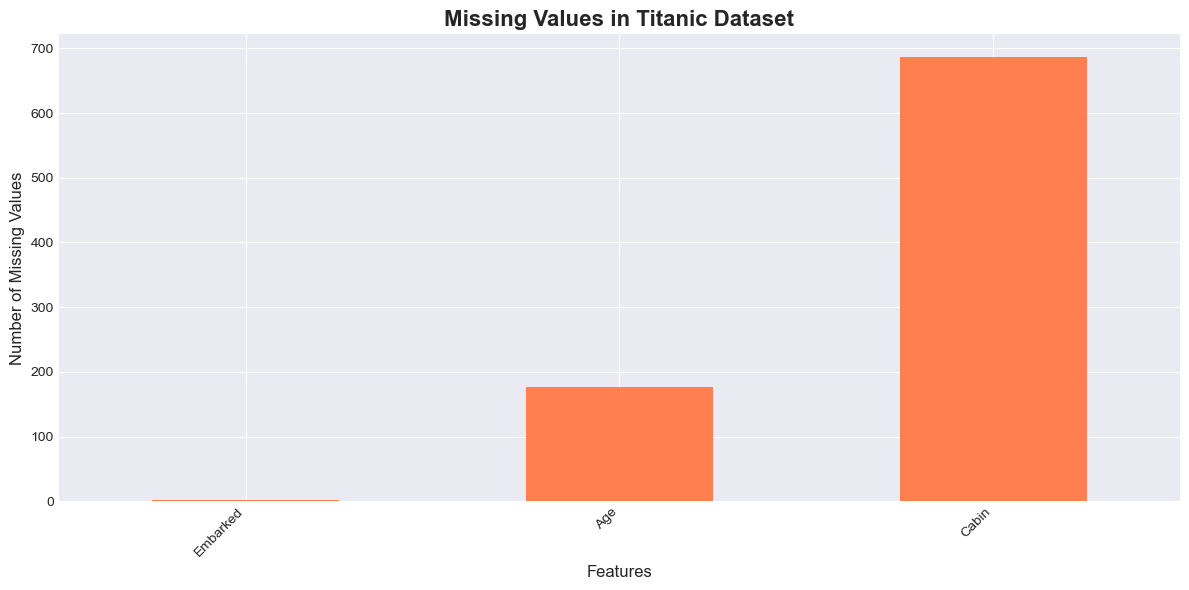

In [ ]:
# style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Basic data overview - Visualize missing values
plt.figure(figsize=(12, 6))
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0]
missing_data.sort_values(inplace=True)
missing_data.plot.bar(color='coral')
plt.title('Missing Values in Titanic Dataset', fontsize=16, fontweight='bold')
plt.xlabel('Features', fontsize=12)
plt.ylabel('Number of Missing Values', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

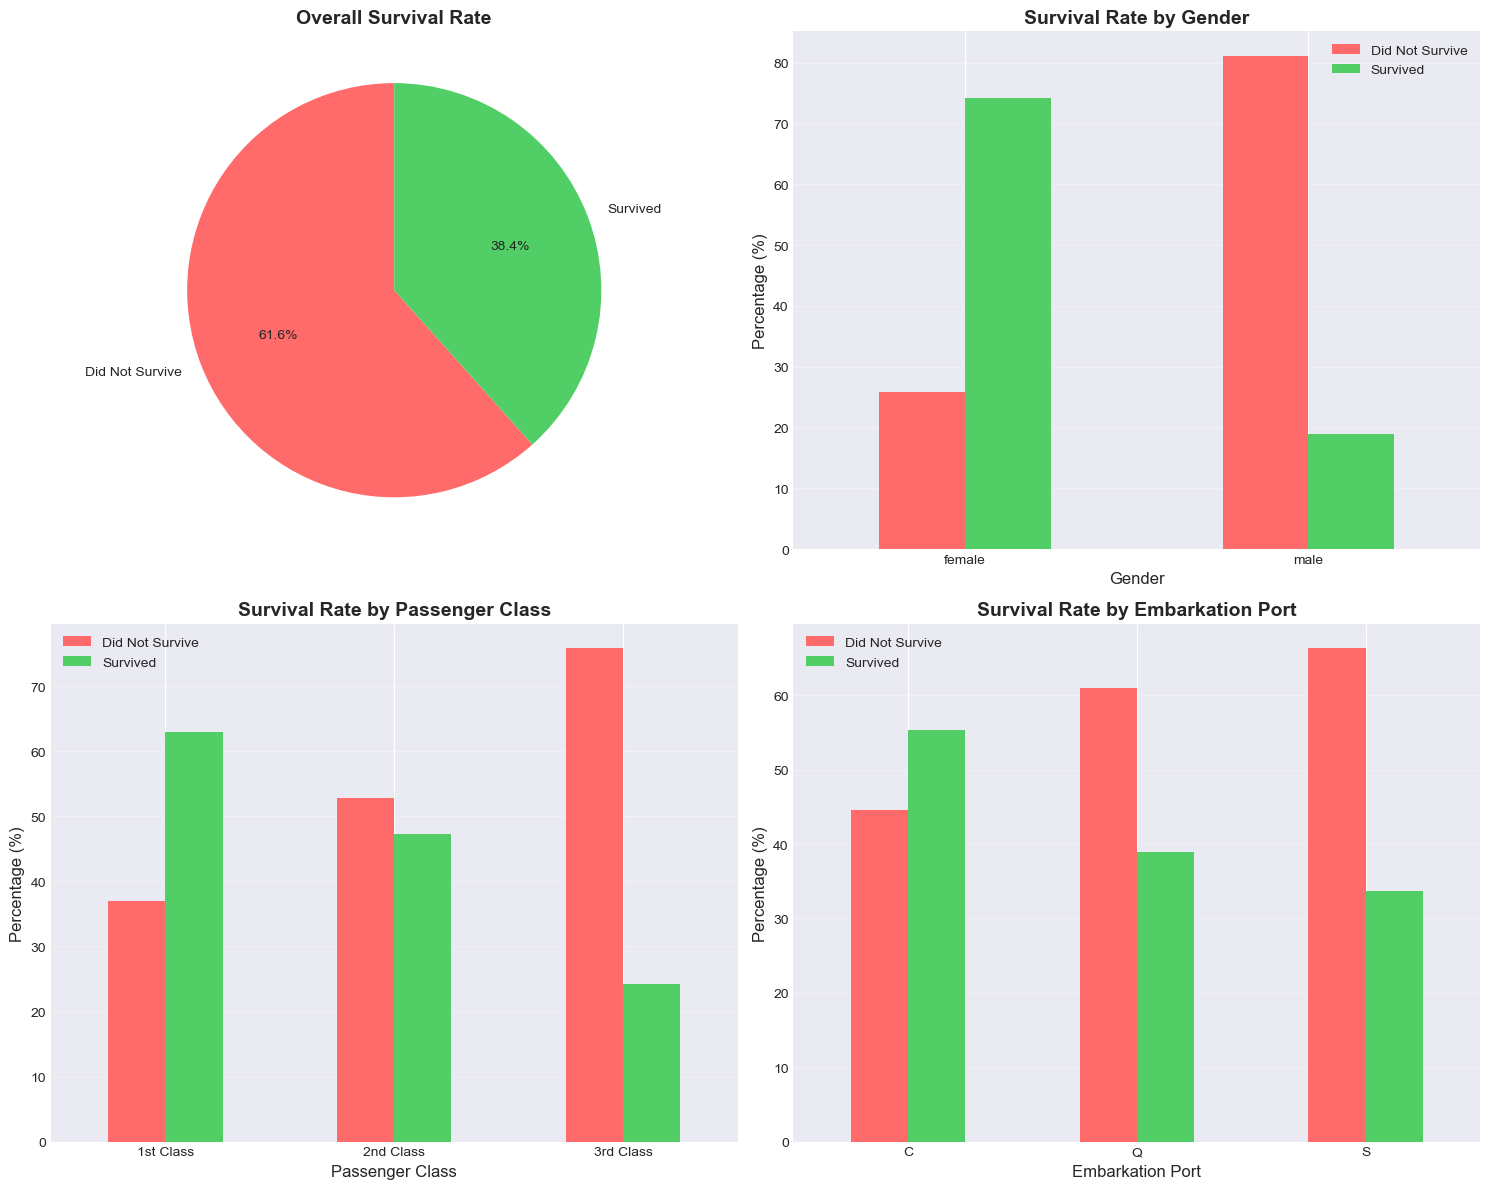

In [ ]:
# Survival rate by different categories
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Survival rate overall
survival_counts = df['Survived'].value_counts()
axes[0, 0].pie(survival_counts, labels=['Did Not Survive', 'Survived'], autopct='%1.1f%%', 
               colors=['#ff6b6b', '#51cf66'], startangle=90)
axes[0, 0].set_title('Overall Survival Rate', fontsize=14, fontweight='bold')

# 2. Pie chart plotting overall survival rate by Gender
if 'Sex' in df.columns:
    survival_by_sex = pd.crosstab(df['Sex'], df['Survived'], normalize='index') * 100
    survival_by_sex.plot(kind='bar', ax=axes[0, 1], color=['#ff6b6b', '#51cf66'])
    axes[0, 1].set_title('Survival Rate by Gender', fontsize=14, fontweight='bold')
    axes[0, 1].set_xlabel('Gender', fontsize=12)
    axes[0, 1].set_ylabel('Percentage (%)', fontsize=12)
    axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=0)
    axes[0, 1].legend(['Did Not Survive', 'Survived'])
    axes[0, 1].grid(axis='y', alpha=0.3)

# 3. Survival rate by Passenger Class
if 'Pclass' in df.columns:
    survival_by_class = pd.crosstab(df['Pclass'], df['Survived'], normalize='index') * 100
    survival_by_class.plot(kind='bar', ax=axes[1, 0], color=['#ff6b6b', '#51cf66'])
    axes[1, 0].set_title('Survival Rate by Passenger Class', fontsize=14, fontweight='bold')
    axes[1, 0].set_xlabel('Passenger Class', fontsize=12)
    axes[1, 0].set_ylabel('Percentage (%)', fontsize=12)
    axes[1, 0].set_xticklabels(['1st Class', '2nd Class', '3rd Class'], rotation=0)
    axes[1, 0].legend(['Did Not Survive', 'Survived'])
    axes[1, 0].grid(axis='y', alpha=0.3)

# 4. Survival rate by Embarkation Port
if 'Embarked' in df.columns:
    survival_by_embarked = pd.crosstab(df['Embarked'], df['Survived'], normalize='index') * 100
    survival_by_embarked.plot(kind='bar', ax=axes[1, 1], color=['#ff6b6b', '#51cf66'])
    axes[1, 1].set_title('Survival Rate by Embarkation Port', fontsize=14, fontweight='bold')
    axes[1, 1].set_xlabel('Embarkation Port', fontsize=12)
    axes[1, 1].set_ylabel('Percentage (%)', fontsize=12)
    axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=0)
    axes[1, 1].legend(['Did Not Survive', 'Survived'])
    axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

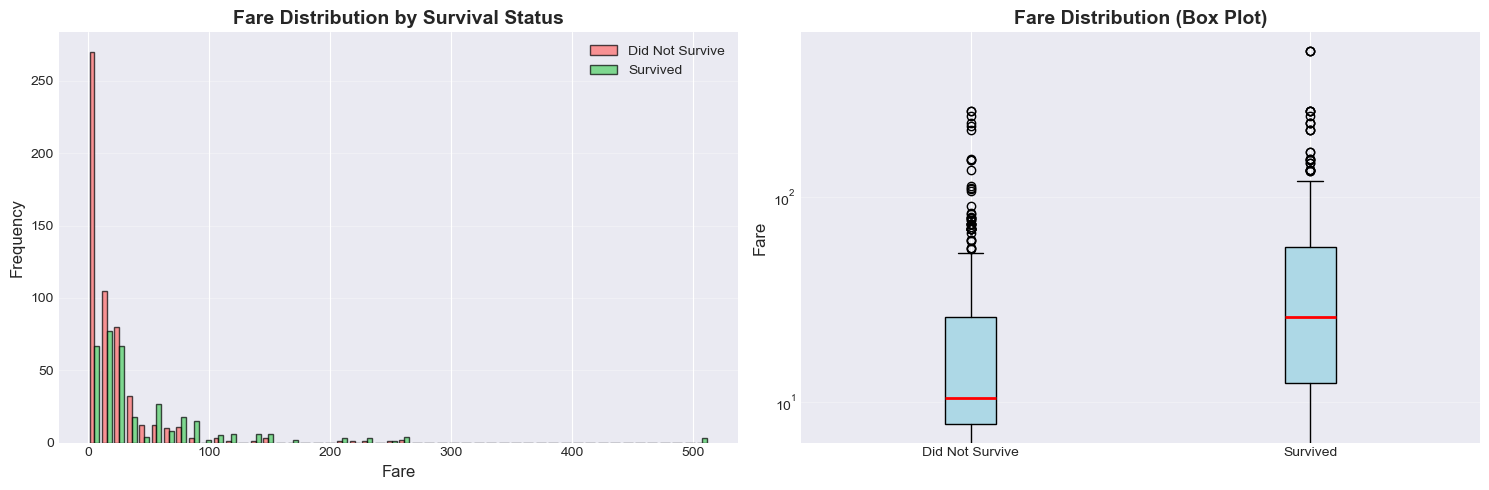

In [10]:
# Fare distribution by survival status
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

if 'Fare' in df.columns:
    # Histogram
    survived_fare = df[df['Survived'] == 1]['Fare'].dropna()
    not_survived_fare = df[df['Survived'] == 0]['Fare'].dropna()
    
    axes[0].hist([not_survived_fare, survived_fare], bins=50, label=['Did Not Survive', 'Survived'], 
                 color=['#ff6b6b', '#51cf66'], alpha=0.7, edgecolor='black')
    axes[0].set_title('Fare Distribution by Survival Status', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Fare', fontsize=12)
    axes[0].set_ylabel('Frequency', fontsize=12)
    axes[0].legend()
    axes[0].grid(axis='y', alpha=0.3)
    
    # Box plot (with log scale for better visualization if needed)
    survival_fare_data = [df[df['Survived'] == 0]['Fare'].dropna(), 
                          df[df['Survived'] == 1]['Fare'].dropna()]
    axes[1].boxplot(survival_fare_data, labels=['Did Not Survive', 'Survived'], 
                    patch_artist=True,
                    boxprops=dict(facecolor='lightblue', color='black'),
                    medianprops=dict(color='red', linewidth=2))
    axes[1].set_title('Fare Distribution (Box Plot)', fontsize=14, fontweight='bold')
    axes[1].set_ylabel('Fare', fontsize=12)
    axes[1].grid(axis='y', alpha=0.3)
    # Apply log scale if fares are highly skewed
    if df['Fare'].max() > 100:
        axes[1].set_yscale('log')

plt.tight_layout()
plt.show()

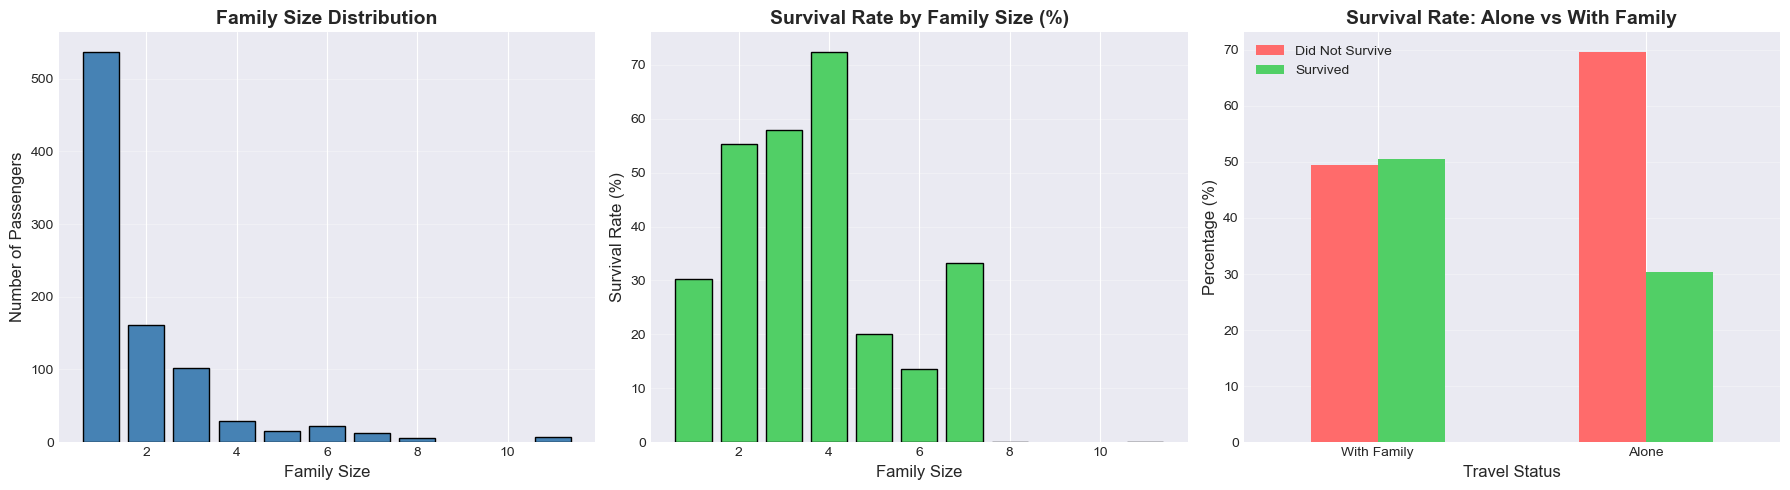

In [11]:
# Family size analysis (SibSp + Parch + 1)
if 'SibSp' in df.columns and 'Parch' in df.columns:
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # Family size distribution
    family_size_counts = df['FamilySize'].value_counts().sort_index()
    axes[0].bar(family_size_counts.index, family_size_counts.values, color='steelblue', edgecolor='black')
    axes[0].set_title('Family Size Distribution', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Family Size', fontsize=12)
    axes[0].set_ylabel('Number of Passengers', fontsize=12)
    axes[0].grid(axis='y', alpha=0.3)
    
    # Survival rate by family size
    survival_by_family = df.groupby('FamilySize')['Survived'].mean() * 100
    axes[1].bar(survival_by_family.index, survival_by_family.values, 
                color='#51cf66', edgecolor='black')
    axes[1].set_title('Survival Rate by Family Size (%)', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Family Size', fontsize=12)
    axes[1].set_ylabel('Survival Rate (%)', fontsize=12)
    axes[1].grid(axis='y', alpha=0.3)
    
    # Survival rate: Alone vs With Family
    survival_alone = pd.crosstab(df['IsAlone'], df['Survived'], normalize='index') * 100
    survival_alone.plot(kind='bar', ax=axes[2], color=['#ff6b6b', '#51cf66'])
    axes[2].set_title('Survival Rate: Alone vs With Family', fontsize=14, fontweight='bold')
    axes[2].set_xlabel('Travel Status', fontsize=12)
    axes[2].set_ylabel('Percentage (%)', fontsize=12)
    axes[2].set_xticklabels(['With Family', 'Alone'], rotation=0)
    axes[2].legend(['Did Not Survive', 'Survived'])
    axes[2].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

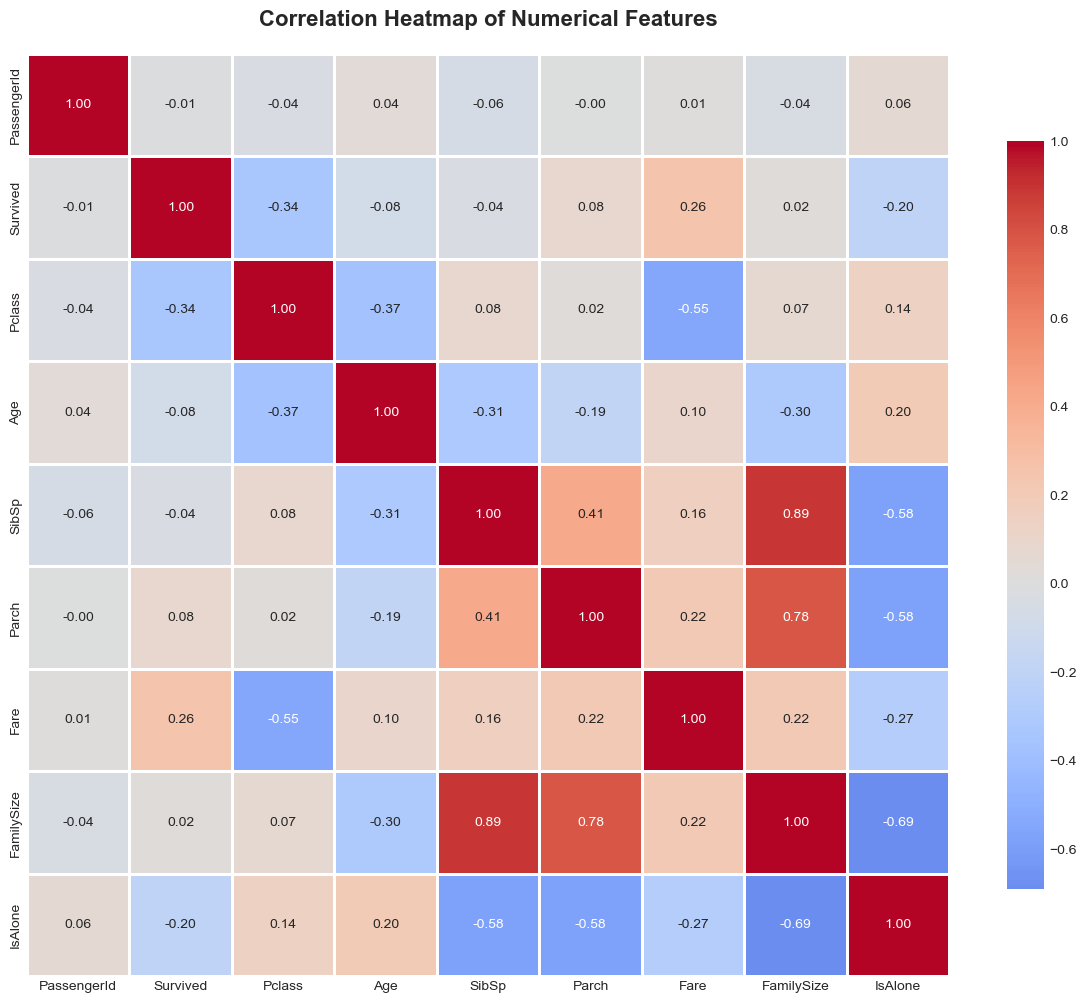

In [ ]:
# Correlation heatmap of numerical features
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
if 'Survived' in numerical_features:
    # To calculate correlation matrix
    corr_matrix = df[numerical_features].corr()
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
                square=True, linewidths=1, cbar_kws={"shrink": 0.8}, 
                annot_kws={'size': 10})
    plt.title('Correlation Heatmap of Numerical Features', fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()

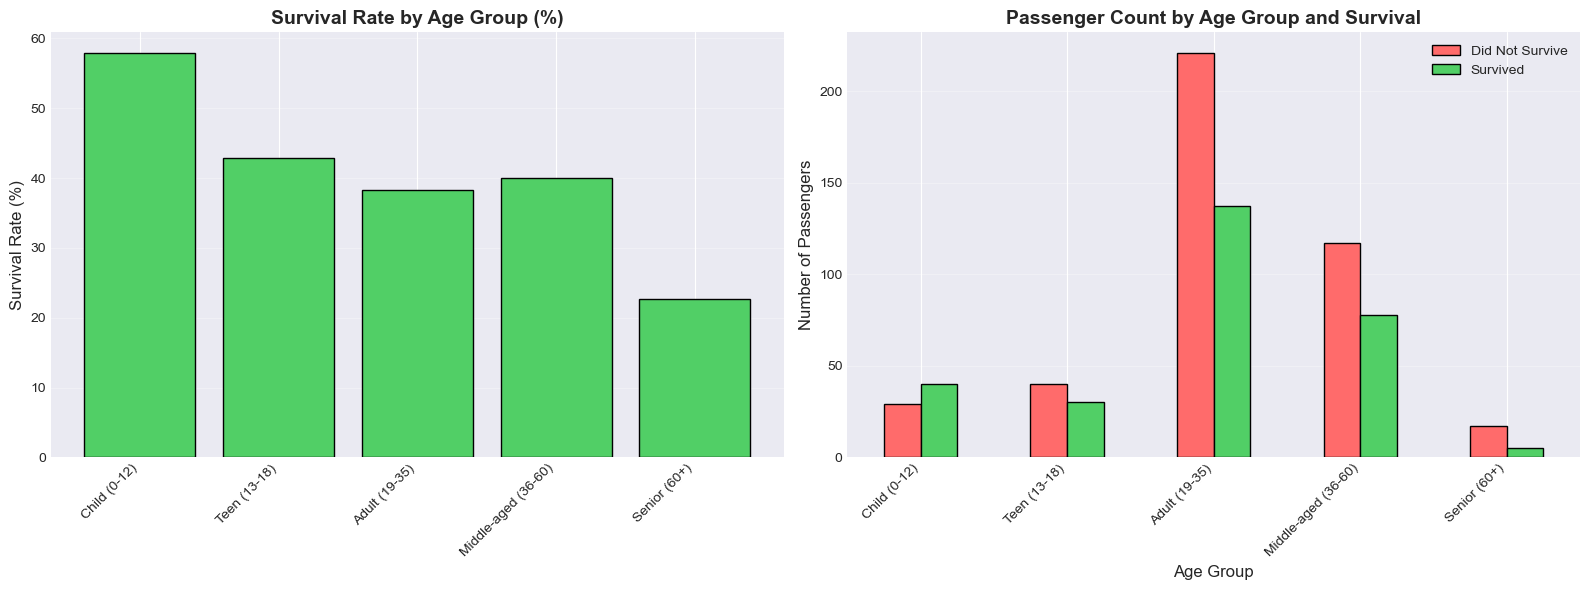

In [13]:
# Age groups analysis
if 'Age' in df.columns:
    df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100], 
                           labels=['Child (0-12)', 'Teen (13-18)', 'Adult (19-35)', 
                                  'Middle-aged (36-60)', 'Senior (60+)'])
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Survival rate by age group
    survival_by_agegroup = df.groupby('AgeGroup')['Survived'].agg(['mean', 'count'])
    survival_rate_age = survival_by_agegroup['mean'] * 100
    
    axes[0].bar(range(len(survival_rate_age)), survival_rate_age.values, 
                color='#51cf66', edgecolor='black')
    axes[0].set_xticks(range(len(survival_rate_age)))
    axes[0].set_xticklabels(survival_rate_age.index, rotation=45, ha='right')
    axes[0].set_title('Survival Rate by Age Group (%)', fontsize=14, fontweight='bold')
    axes[0].set_ylabel('Survival Rate (%)', fontsize=12)
    axes[0].grid(axis='y', alpha=0.3)
    
    # Count by age group and survival status
    age_survival_crosstab = pd.crosstab(df['AgeGroup'], df['Survived'])
    age_survival_crosstab.plot(kind='bar', ax=axes[1], color=['#ff6b6b', '#51cf66'], 
                               edgecolor='black')
    axes[1].set_title('Passenger Count by Age Group and Survival', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Age Group', fontsize=12)
    axes[1].set_ylabel('Number of Passengers', fontsize=12)
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
    axes[1].legend(['Did Not Survive', 'Survived'])
    axes[1].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()